# Build some toy models and how to sample them

In [1]:
# use autoreload
%load_ext autoreload
%autoreload 2

import yaml
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

# import lightning trainer
import lightning as L
from lightning.pytorch.loggers import WandbLogger

# imports
from jepa.modules import TransformerContrastiveLearning

## Explore Model Loading

In [3]:
with open("configs/4d_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
model = TransformerContrastiveLearning(**config)

In [8]:
for batch in model.train_dataloader():
    x, mask, pids, edge_index, edge_mask, y, events_df = batch["x"], batch["mask"], batch["pids"], batch["edge_index"], batch["edge_mask"], batch["y"], batch["event"]
    print(x.shape, mask.shape)

    break

torch.Size([200, 20, 4, 2]) torch.Size([200, 20, 4])


## Train Run

In [2]:
with open("configs/4d_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model = TransformerContrastiveLearning(**config)

/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /global/homes/d/danieltm/.conda/envs/jepa/lib/python ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type        | Params
-------------------------------------------
0 | embedding  | Transformer | 42.6 K
1 | aggregator | Aggregator  | 43.4 K
-------------------------------------------
86.0 K    Trainable params
0         Non-trainable params
86.0 K    Total params
0.344     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]Batch shapes: x=torch.Size([200, 20, 4, 2]), mask=torch.Size([200, 20, 4]), pids=torch.Size([200, 20]), edge_index=torch.Size([200, 190, 2]), edge_mask=torch.Size([200, 190]), y=torch.Size([200, 190])
Max edge index: 19
Distances shape: torch.Size([38000])
Sample distances: tensor([0.1603, 0.1860, 0.2459, 0.4895, 0.5815], device='cuda:0')


/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 200. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


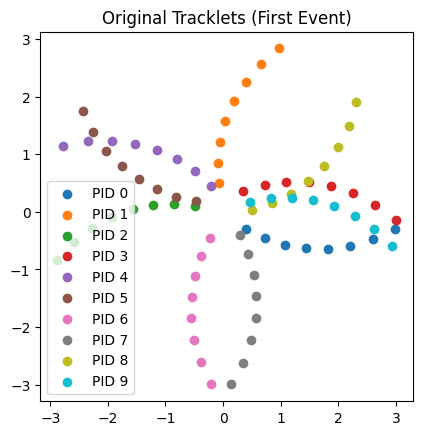

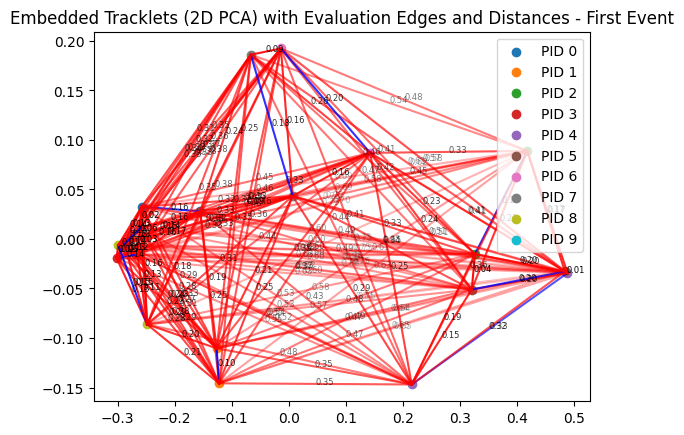

First Batch Metrics:
  Efficiency: 1.0000
  Purity: 0.0526
  Mean True Distance: 0.1824
  Mean Fake Distance: 0.3560
Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:02<00:02,  0.38it/s]Batch shapes: x=torch.Size([200, 20, 4, 2]), mask=torch.Size([200, 20, 4]), pids=torch.Size([200, 20]), edge_index=torch.Size([200, 190, 2]), edge_mask=torch.Size([200, 190]), y=torch.Size([200, 190])
Max edge index: 19
Distances shape: torch.Size([38000])
Sample distances: tensor([0.2195, 0.1106, 0.2498, 0.3783, 0.3024], device='cuda:0')
Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           Starting first training step...
Batch shapes: x=torch.Size([200, 20, 4, 2]), mask=torch.Size([200, 20, 4]), pids=torch.Size([200, 20]), edge_index=torch.Size([200, 190, 2]), edge_mask=torch.Size([200, 190]), y=torch.Size([200, 190])
Embedded tracklets shape: torch.Size([200, 20, 8])
Max edge index: 19
Embeddings 0 shape: torch.Size([38000, 8])
Embeddings 1 shape: torch.Size([38000, 8])
Dis

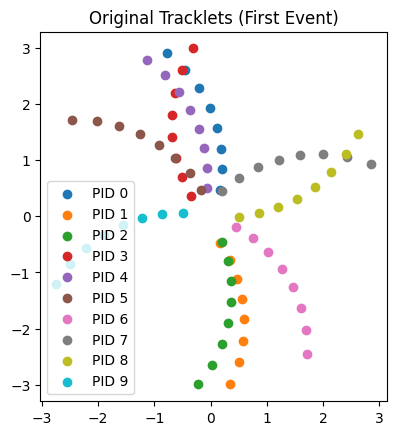

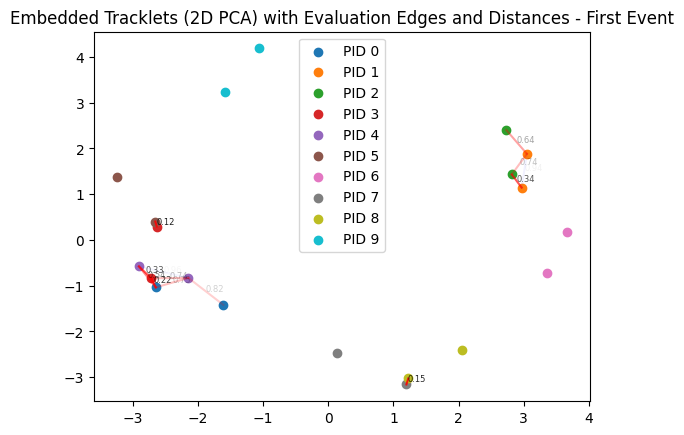

First Batch Metrics:
  Efficiency: 0.0540
  Purity: 0.0370
  Mean True Distance: 1.1630
  Mean Fake Distance: 4.3110
Epoch 1: 100%|██████████| 100/100 [00:19<00:00,  5.13it/s, v_num=z4wa]

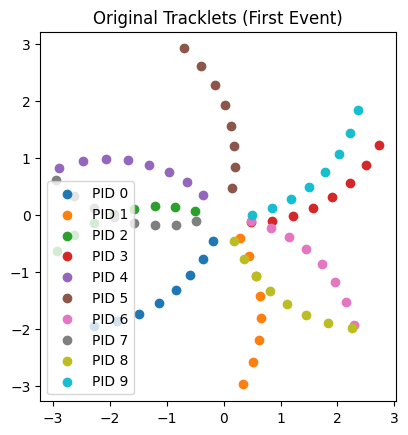

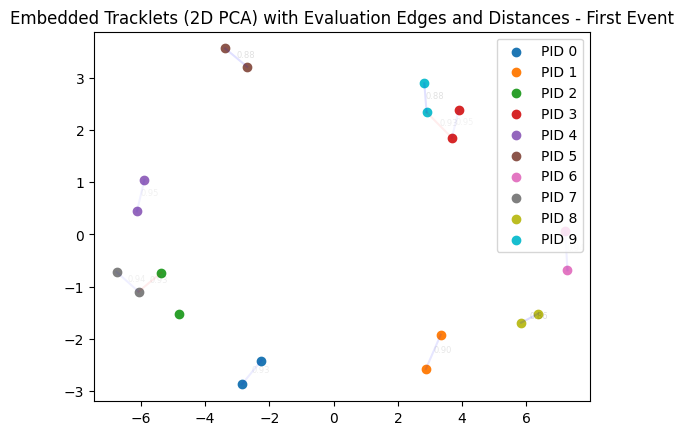

First Batch Metrics:
  Efficiency: 0.6935
  Purity: 0.5845
  Mean True Distance: 0.9730
  Mean Fake Distance: 6.5459
Epoch 2: 100%|██████████| 100/100 [00:19<00:00,  5.21it/s, v_num=z4wa]

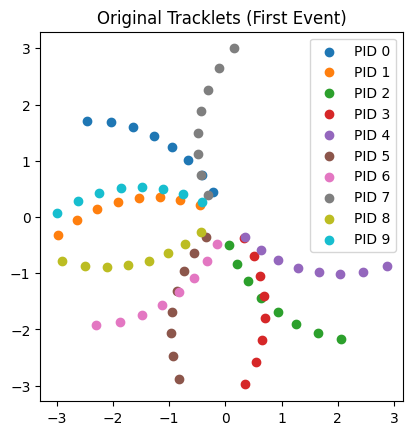

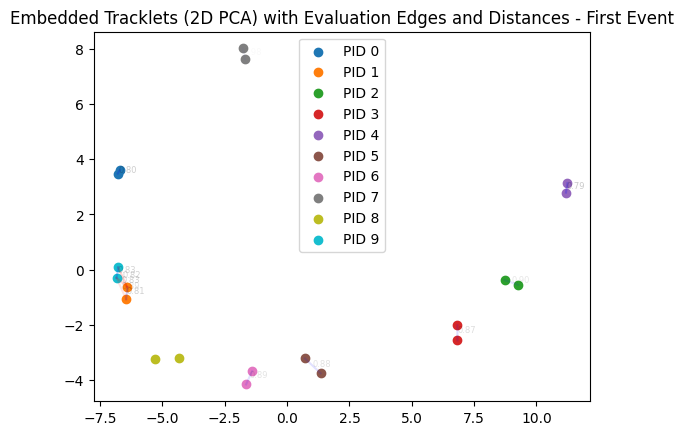

First Batch Metrics:
  Efficiency: 0.8555
  Purity: 0.7433
  Mean True Distance: 0.9013
  Mean Fake Distance: 10.1503
Epoch 3: 100%|██████████| 100/100 [00:20<00:00,  4.92it/s, v_num=z4wa]

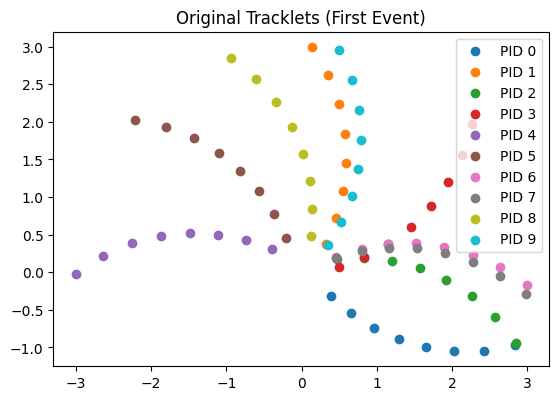

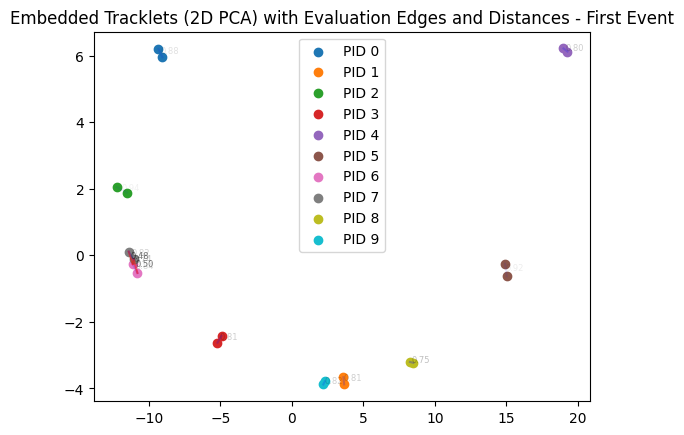

First Batch Metrics:
  Efficiency: 0.9355
  Purity: 0.8485
  Mean True Distance: 0.8439
  Mean Fake Distance: 15.8097
Epoch 4: 100%|██████████| 100/100 [00:19<00:00,  5.07it/s, v_num=z4wa]

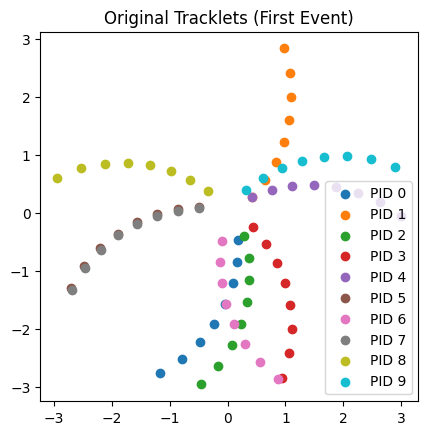

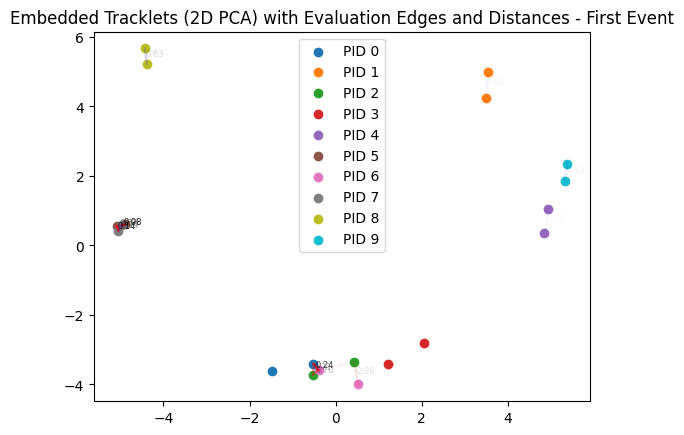

First Batch Metrics:
  Efficiency: 0.5175
  Purity: 0.4153
  Mean True Distance: 1.0063
  Mean Fake Distance: 6.8520
Epoch 5:  64%|██████▍   | 64/100 [00:13<00:07,  4.90it/s, v_num=z4wa] 

In [4]:
wandb_logger = WandbLogger(project="JEPA_toytrack_splittracks_contrastive_transformer")
trainer = L.Trainer(
    max_epochs=10, 
    devices=1, 
    accelerator="gpu", 
    limit_train_batches = config["train_batches"], 
    limit_val_batches = config["val_batches"],
    logger = wandb_logger,
)
trainer.fit(model=model)

## Visualize Source-Target Encodings

In [24]:
model = model.to("cpu")

In [25]:
# Loop through a 10 batches, append the source, target encodings
source_encodings = []
target_encodings = []

batches = 0

with torch.no_grad():
    for batch in model.train_dataloader():
        results = model.shared_evaluation(batch, 0)
        source_encodings.append(results["context"].detach())
        target_encodings.append(results["target"].detach())
        batches += 1
        if batches > 10:
            break


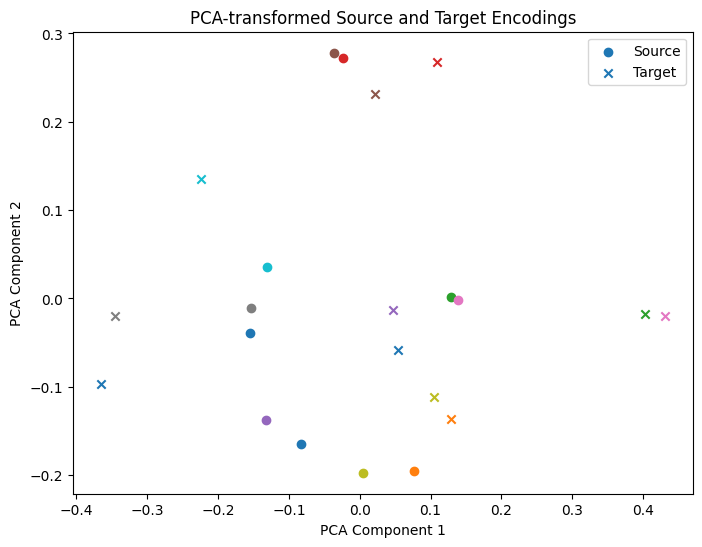

In [26]:
# Now PCA down the source and target encodings

# Sketch of changes:
# - Concatenate the source and target encodings into a single matrix
# - Perform PCA on the concatenated matrix to reduce dimensionality 
# - Extract the transformed source and target encodings from the PCA result
# - Visualize the PCA-transformed encodings in a scatter plot with matching colors for source and target encodings
# - Use 'o' for source encodings and 'x' for target encodings

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Concatenate source and target encodings
source_encodings_cat = np.concatenate([x.numpy() for x in source_encodings], axis=0)
target_encodings_cat = np.concatenate([x.numpy() for x in target_encodings], axis=0)
encodings_matrix = np.concatenate([source_encodings_cat, target_encodings_cat], axis=0)

# Perform PCA
pca = PCA(n_components=2)
pca_encodings = pca.fit_transform(encodings_matrix)

# Extract transformed source and target encodings
pca_source_encodings = pca_encodings[:len(source_encodings_cat)]
pca_target_encodings = pca_encodings[len(source_encodings_cat):]

# Visualize PCA-transformed encodings
plt.figure(figsize=(8, 6))
for i in range(len(pca_source_encodings)):
    plt.scatter(pca_source_encodings[i, 0], pca_source_encodings[i, 1], color=f'C{i}', marker='o', label='Source' if i == 0 else "")
    plt.scatter(pca_target_encodings[i, 0], pca_target_encodings[i, 1], color=f'C{i}', marker='x', label='Target' if i == 0 else "")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA-transformed Source and Target Encodings')
plt.show()

In [27]:
# Loop through a 10 batches, append the source, target encodings
prediction_encodings = []
target_encodings = []

batches = 0

with torch.no_grad():
    for batch in model.train_dataloader():
        results = model.shared_evaluation(batch, 0)
        prediction_encodings.append(results["prediction"].detach())
        target_encodings.append(results["target"].detach())
        batches += 1
        if batches > 10:
            break


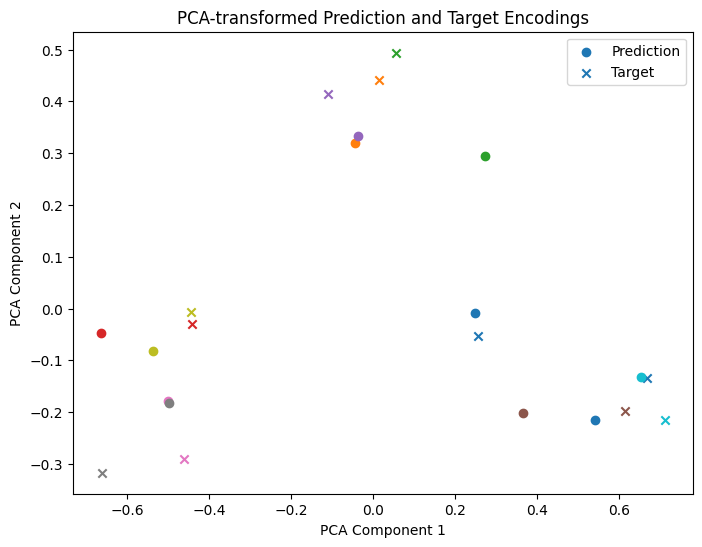

In [28]:
# Now PCA down the source and target encodings

# Sketch of changes:
# - Concatenate the source and target encodings into a single matrix
# - Perform PCA on the concatenated matrix to reduce dimensionality 
# - Extract the transformed source and target encodings from the PCA result
# - Visualize the PCA-transformed encodings in a scatter plot with matching colors for source and target encodings
# - Use 'o' for source encodings and 'x' for target encodings

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Concatenate source and target encodings
prediction_encodings_cat = np.concatenate([x.numpy() for x in prediction_encodings], axis=0)
target_encodings_cat = np.concatenate([x.numpy() for x in target_encodings], axis=0)
encodings_matrix = np.concatenate([prediction_encodings_cat, target_encodings_cat], axis=0)

# Perform PCA
pca = PCA(n_components=2)
pca_encodings = pca.fit_transform(encodings_matrix)

# Extract transformed source and target encodings
pca_prediction_encodings = pca_encodings[:len(prediction_encodings_cat)]
pca_target_encodings = pca_encodings[len(prediction_encodings_cat):]

# Visualize PCA-transformed encodings
plt.figure(figsize=(8, 6))
for i in range(len(pca_prediction_encodings)):
    plt.scatter(pca_prediction_encodings[i, 0], pca_prediction_encodings[i, 1], color=f'C{i}', marker='o', label='Prediction' if i == 0 else "")
    plt.scatter(pca_target_encodings[i, 0], pca_target_encodings[i, 1], color=f'C{i}', marker='x', label='Target' if i == 0 else "")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA-transformed Prediction and Target Encodings')
plt.show()